In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import re


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quantium/QVI_purchase_behaviour.csv
/kaggle/input/quantium/QVI_transaction_data.xlsx


# <center>ANALYSIS OF CUSTOMER PURCHASE AND TRANSACTIONS OF CHIPS

# DATA PREPARATION

## PURCHASE BEHAVIOUR DATA

In [2]:
purchase=pd.read_csv("/kaggle/input/quantium/QVI_purchase_behaviour.csv")

In [3]:
print(f"The purchase data of the customers has {purchase.shape[0]} observations and {purchase.shape[1]} variables/columns")
print(" ")
print("-----------------------------------------------------")

print("Below are the first 5 observations")
print(" ")
print(purchase.head(5))
print(" ")
print("-----------------------------------------------------")
print(purchase.info())
print(" ")
print("-----------------------------------------------------")
print(purchase.describe(include="object"))

The purchase data of the customers has 72637 observations and 3 variables/columns
 
-----------------------------------------------------
Below are the first 5 observations
 
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
 
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
 
--------------------

## TRANSACTION DATA

In [4]:
transaction=pd.read_excel("/kaggle/input/quantium/QVI_transaction_data.xlsx")

In [5]:
print(f"The transaction data of the customers has {transaction.shape[0]} observations and {transaction.shape[1]} variables/columns")
print(" ")
print("-----------------------------------------------------")

print("Below are the first 5 observations")
print(" ")
print(transaction.head(5))
print(" ")
print("-----------------------------------------------------")
print(transaction.info())
print(" ")
print("-----------------------------------------------------")
print(transaction.describe(include="object"))
print(" ")
print("-----------------------------------------------------")
print(transaction.describe())

The transaction data of the customers has 264836 observations and 8 variables/columns
 
-----------------------------------------------------
Below are the first 5 observations
 
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
 
-----------------------------------------------------
<class 'pandas.core.

## Cleaning Transaction Data

**OUTLIER IN TRANSACTIONS DATA**

In the data description, 75% of the product quantity is less than 5. However, there is a max of 200. This gives an indication of outliers and below are the observations with the outliers

In [6]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
transaction.loc[transaction.PROD_QTY>10]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [8]:
transaction=transaction.loc[transaction.PROD_QTY<10]

In [9]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,43464.036230,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,105.389007,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


**CLEANING PRODUCT NAME AND CREATING NEW COLUMNS**

In [10]:
transaction['PRODUCT'] = (transaction['PROD_NAME'].str.replace(r'[0-9]+[g|G]', '').
                              str.strip().str.replace(r'[^\w]', ' ').str.lower().str.replace(r'\s{2,}', ' '))
transaction["PRODUCT"]=transaction['PRODUCT'].apply(lambda x: x.strip().split(" ", 1)[1])

/tmp/ipykernel_32/3306751786.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  transaction['PRODUCT'] = (transaction['PROD_NAME'].str.replace(r'[0-9]+[g|G]', '').
/tmp/ipykernel_32/3306751786.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  str.strip().str.replace(r'[^\w]', ' ').str.lower().str.replace(r'\s{2,}', ' '))


In [11]:
transaction.drop(transaction[transaction.PRODUCT.str.contains("salsa")].index, inplace=True)

In [12]:
transaction["BRAND"]=transaction['PROD_NAME'].apply(lambda x: x.strip().split()[0])

transaction["PACK_SIZE"]=transaction['PROD_NAME'].str.extract('(\d+)')

In [13]:
transaction['PROD_NAME'] = (transaction['PROD_NAME'].str.replace(r'[0-9]+[g|G]', '').
                              str.strip().str.replace(r'[^\w]', ' ').str.lower().str.replace(r'\s{2,}', ' '))

/tmp/ipykernel_32/4174639063.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  transaction['PROD_NAME'] = (transaction['PROD_NAME'].str.replace(r'[0-9]+[g|G]', '').
/tmp/ipykernel_32/4174639063.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  str.strip().str.replace(r'[^\w]', ' ').str.lower().str.replace(r'\s{2,}', ' '))


In [14]:
brands = {'Dorito':'Doritos','Infzns':'Infuzions',
          'Snbts':'Sunbites','Grain':'Grain Wave',
          'RRD':'Red','Smith':'Smiths',
          'GrnWves':'Grain Wave','WW':'Woolworths',
          'NCC':'Natural'}
transaction['BRAND'] = transaction['BRAND'].replace(brands)

In [15]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT,BRAND,PACK_SIZE
0,43390,1,1000,1,5,natural chip compny seasalt,2,6.0,chip compny seasalt,Natural,175
1,43599,1,1307,348,66,ccs nacho cheese,3,6.3,nacho cheese,CCs,175
2,43605,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,crinkle cut chips chicken,Smiths,170
3,43329,2,2373,974,69,smiths chip thinly s cream onion,5,15.0,chip thinly s cream onion,Smiths,175
4,43330,2,2426,1038,108,kettle tortilla chpshny jlpno chili,3,13.8,tortilla chpshny jlpno chili,Kettle,150


**SOME CHIPS PRODUCTS**

In [16]:
sorted(transaction["PROD_NAME"].unique())[:10]

['burger rings',
 'ccs nacho cheese',
 'ccs original',
 'ccs tasty cheese',
 'cheetos chs bacon balls',
 'cheetos puffs',
 'cheezels cheese',
 'cheezels cheese box',
 'cobs popd sea salt chips',
 'cobs popd sour crm chives chips']

**CHANGING DATE TYPE**

In [17]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'],errors='coerce',unit='d',origin='1900-01-01')

---
# EXPLORATORY ANALYSIS

## Customer Segmentations

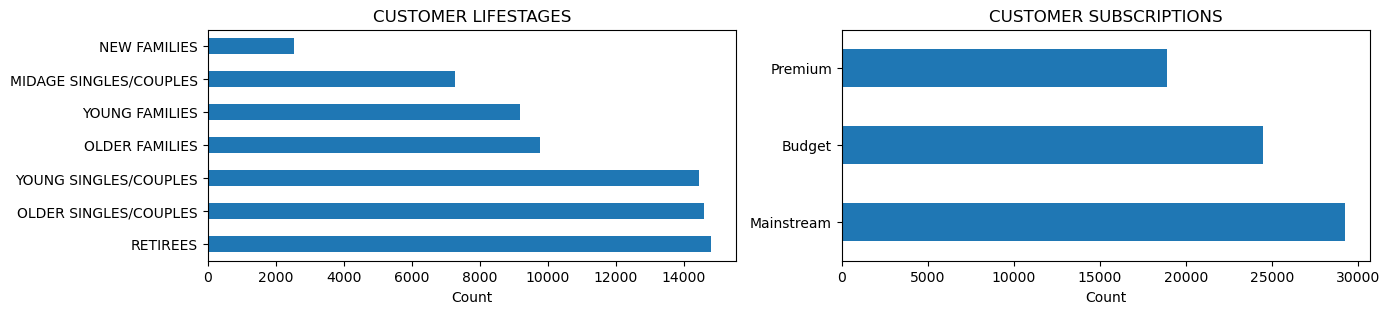

In [18]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
purchase.LIFESTAGE.value_counts().plot(kind="barh")
plt.title("CUSTOMER LIFESTAGES")
plt.xlabel("Count")
plt.subplot(1,2,2)
purchase.PREMIUM_CUSTOMER.value_counts().plot(kind="barh")
plt.title("CUSTOMER SUBSCRIPTIONS")
plt.xlabel("Count");

`From above, majority of the customers are Mainstream Subscribers and for lifestage, majority are Retirees, Older Singles/Couples, Young singles/Couples.`

In [19]:
dfg=purchase.groupby(by=["LIFESTAGE","PREMIUM_CUSTOMER"]).size().unstack()

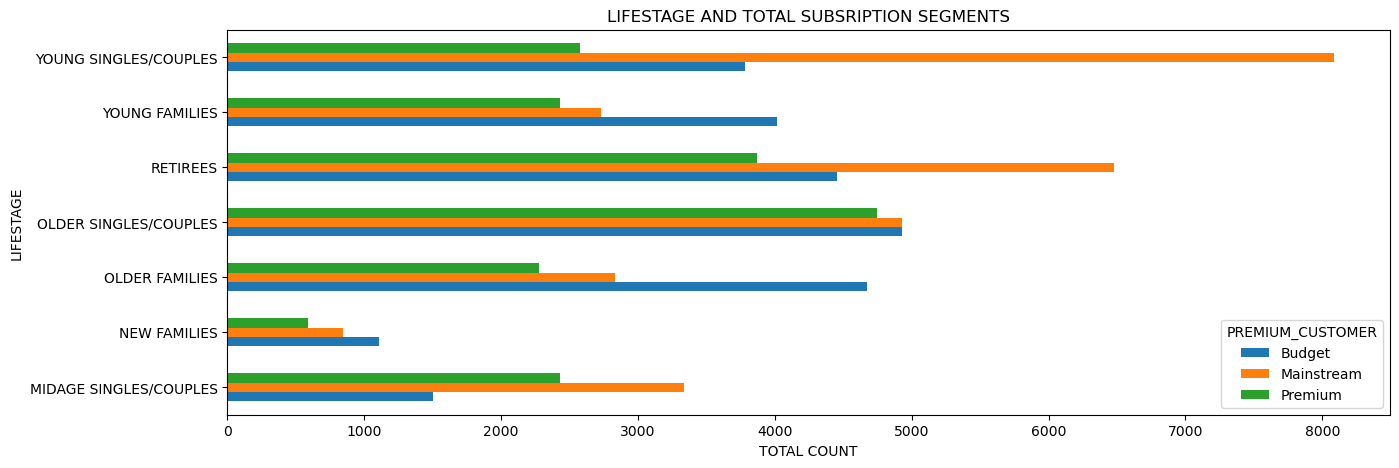

In [20]:
dfg.plot(kind='barh', figsize=(15,5))
plt.title("LIFESTAGE AND TOTAL SUBSRIPTION SEGMENTS")
plt.xlabel("TOTAL COUNT");

`From above, we observe that amongst Retirees and Young Singles/Couples, Majority are mainstream subscribers. On the other hand Older Singles/Couples are almost evenly Budget/MainstreM/Premium Subscribers`

## Analysis of Transactions

## TREND

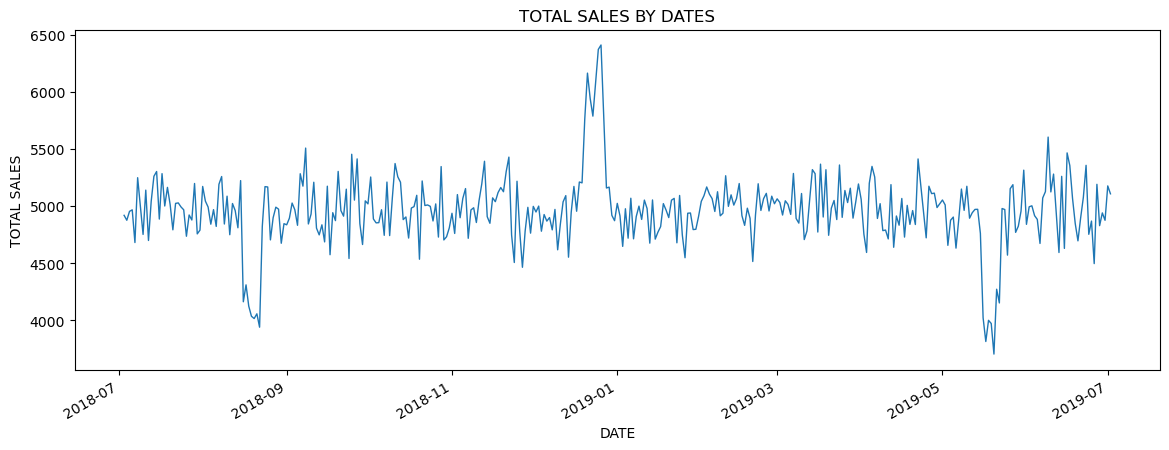

In [21]:
transaction.groupby("DATE").TOT_SALES.sum().plot(kind="line", figsize=(14,5), lw=1)
plt.title("TOTAL SALES BY DATES")
plt.ylabel("TOTAL SALES")
plt.show();

`From here, It is observed that there was a spike in sales around December 2018. However, there were some dips between August 2018 - September 2018 as well as May 2019 - June 2019 `

## PRODUCTS PERFORMANCE

In [22]:
transaction['PROD_NBR']=transaction['PROD_NBR'].astype("object")
transaction['STORE_NBR']=transaction['STORE_NBR'].astype("object")

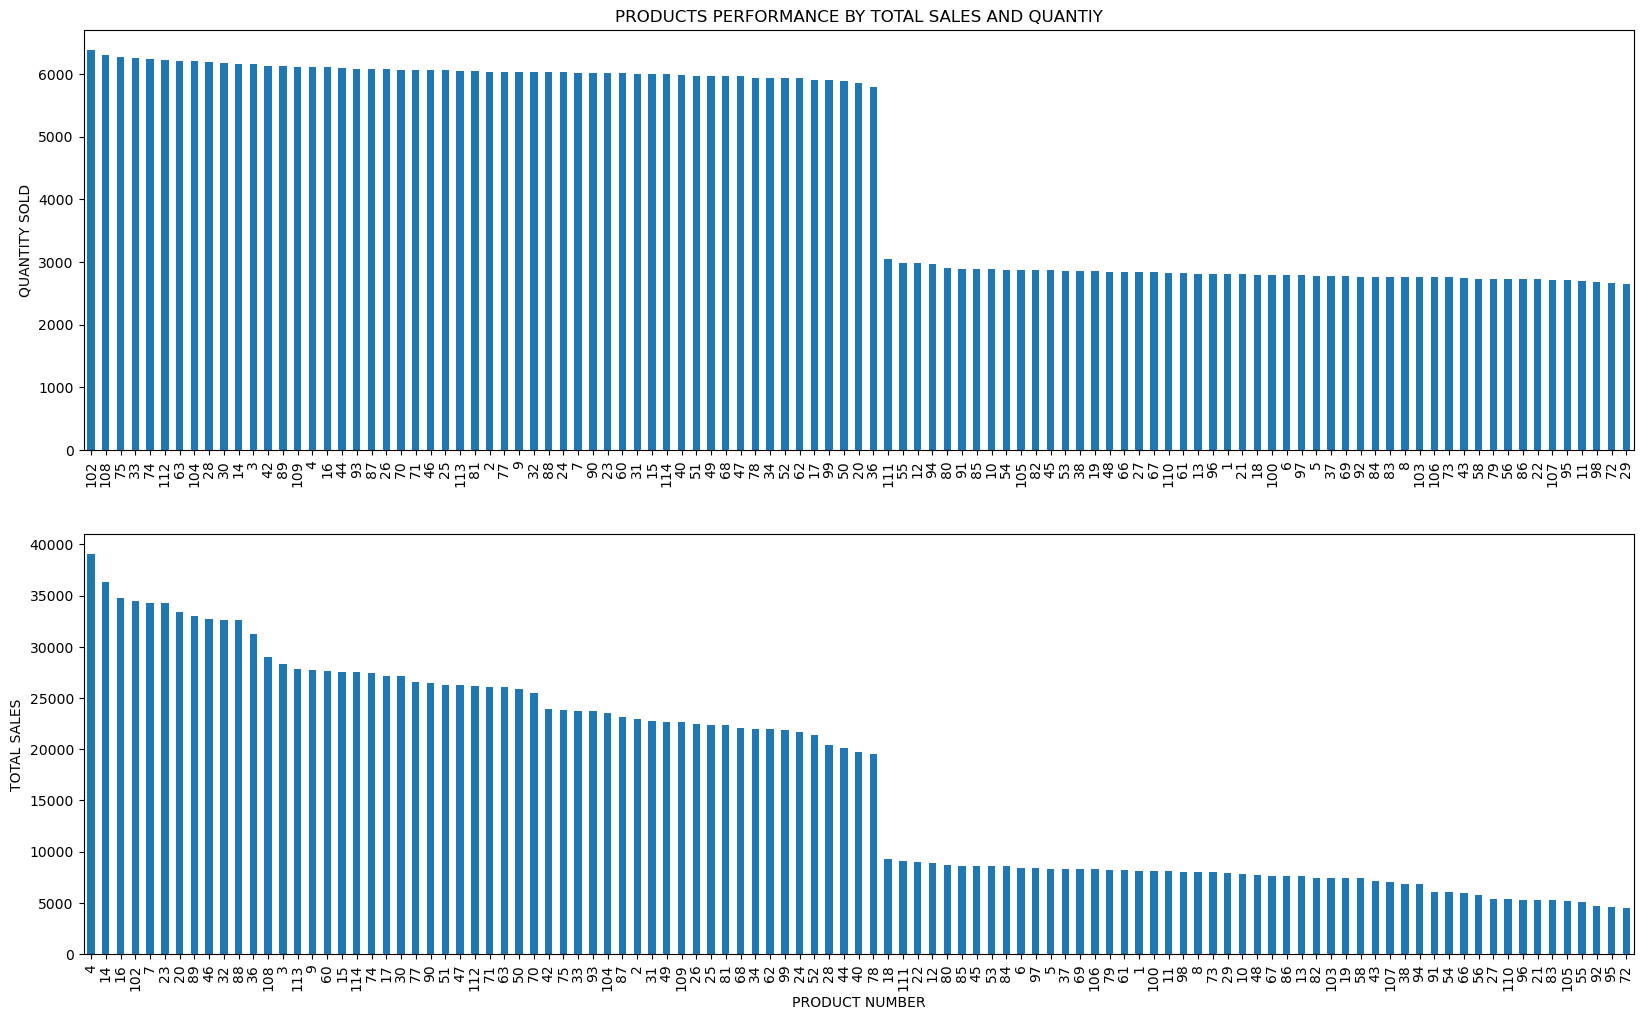

In [23]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
transaction.groupby('PROD_NBR').PROD_QTY.sum().sort_values(ascending=False).plot(kind="bar")
plt.title("PRODUCTS PERFORMANCE BY TOTAL SALES AND QUANTIY")
plt.ylabel("QUANTITY SOLD")
plt.xlabel(" ")


plt.subplot(2,1,2)
transaction.groupby('PROD_NBR').TOT_SALES.sum().sort_values(ascending=False).plot(kind="bar")
plt.ylabel("TOTAL SALES")
plt.xlabel("PRODUCT NUMBER");

`From above, product 102 has sold most quantity but appears to be the 4th in terms of total sales. However, product 4 tops sales while it is the 16th in terms of quantity sold. This is most likely due to price competition`

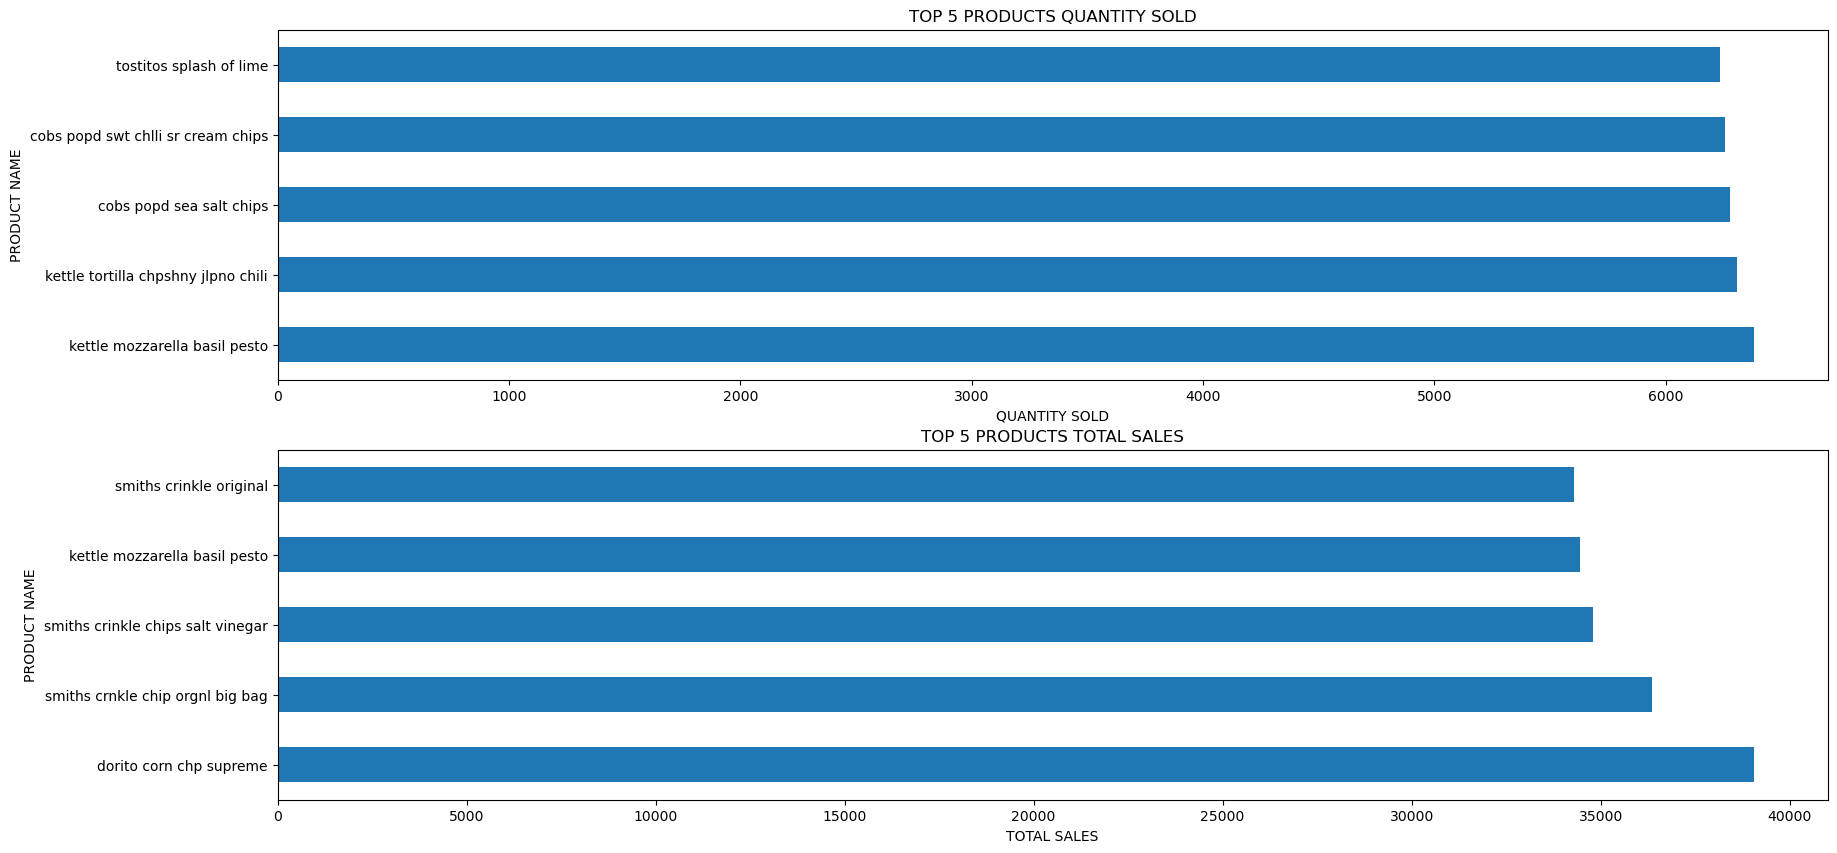

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
transaction.groupby('PROD_NAME').PROD_QTY.sum().sort_values(ascending=False).head(5).plot(kind="barh")
plt.title("TOP 5 PRODUCTS QUANTITY SOLD")
plt.xlabel("QUANTITY SOLD")
plt.ylabel("PRODUCT NAME")


plt.subplot(2,1,2)
transaction.groupby('PROD_NAME').TOT_SALES.sum().sort_values(ascending=False).head(5).plot(kind="barh")
plt.title("TOP 5 PRODUCTS TOTAL SALES")
plt.xlabel("TOTAL SALES")
plt.ylabel("PRODUCT NAME");

`The product with most sales is Dorito Corn Chips Supreme while Kettle Mozzarella basil pesto tops the total quantity sold and it the 4th in terms of sales.`

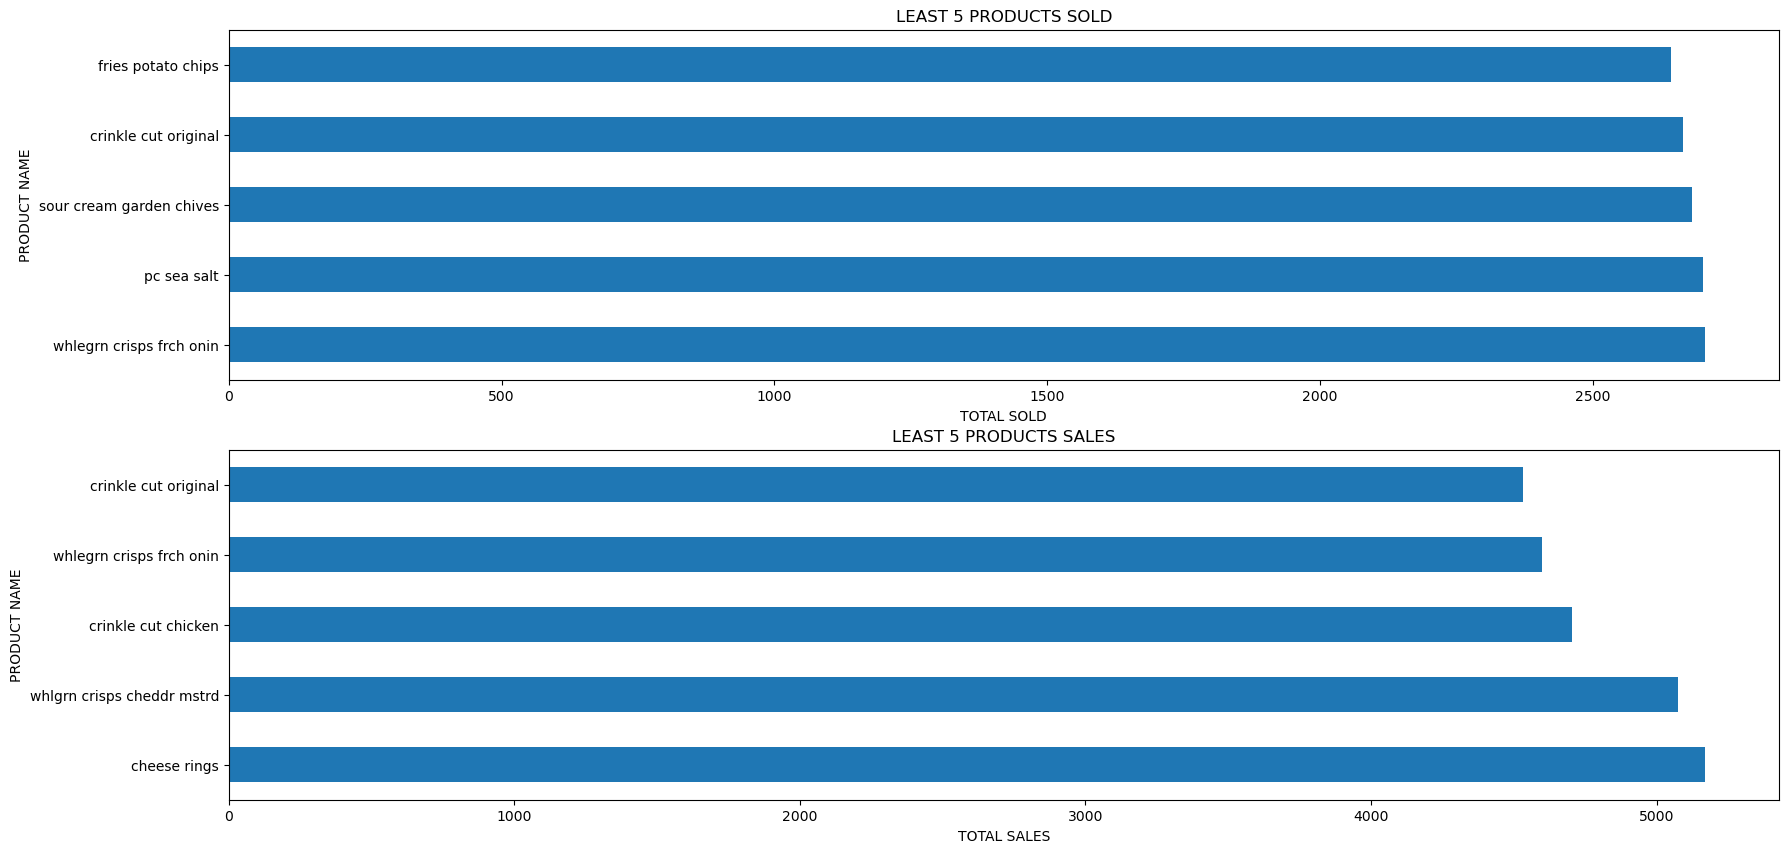

In [25]:

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
transaction.groupby('PRODUCT').PROD_QTY.sum().sort_values(ascending=False).tail(5).plot(kind="barh")
plt.title("LEAST 5 PRODUCTS SOLD")
plt.xlabel("TOTAL SOLD")
plt.ylabel("PRODUCT NAME")

plt.subplot(2,1,2)
transaction.groupby('PRODUCT').TOT_SALES.sum().sort_values(ascending=False).tail(5).plot(kind="barh")
plt.title("LEAST 5 PRODUCTS SALES")
plt.xlabel("TOTAL SALES")
plt.ylabel("PRODUCT NAME");

`The least sold product is fries potato chips. However, crinkle cut original appears to have the least sales amount.`

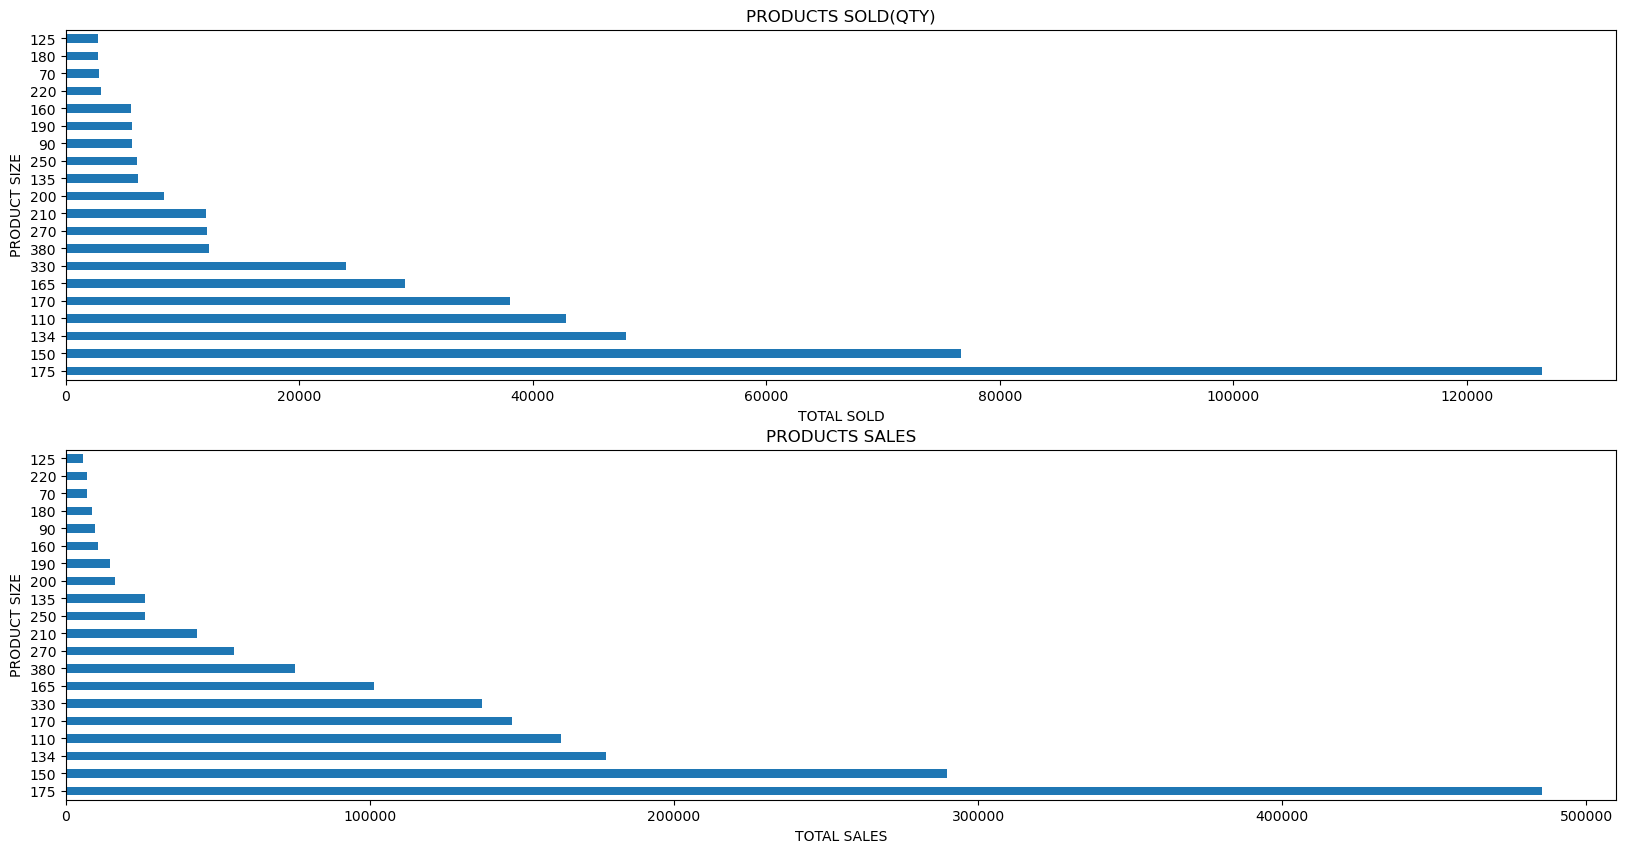

In [26]:

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
transaction.groupby('PACK_SIZE').PROD_QTY.sum().sort_values(ascending=False).plot(kind="barh")
plt.title("PRODUCTS SOLD(QTY)")
plt.xlabel("TOTAL SOLD")
plt.ylabel("PRODUCT SIZE")

plt.subplot(2,1,2)
transaction.groupby('PACK_SIZE').TOT_SALES.sum().sort_values(ascending=False).plot(kind="barh")
plt.title("PRODUCTS SALES")
plt.xlabel("TOTAL SALES")
plt.ylabel("PRODUCT SIZE");

`From here, majority of customers prefer 150g/175g Packsize compared to the other sizes`

## STORE PERFORMANCE

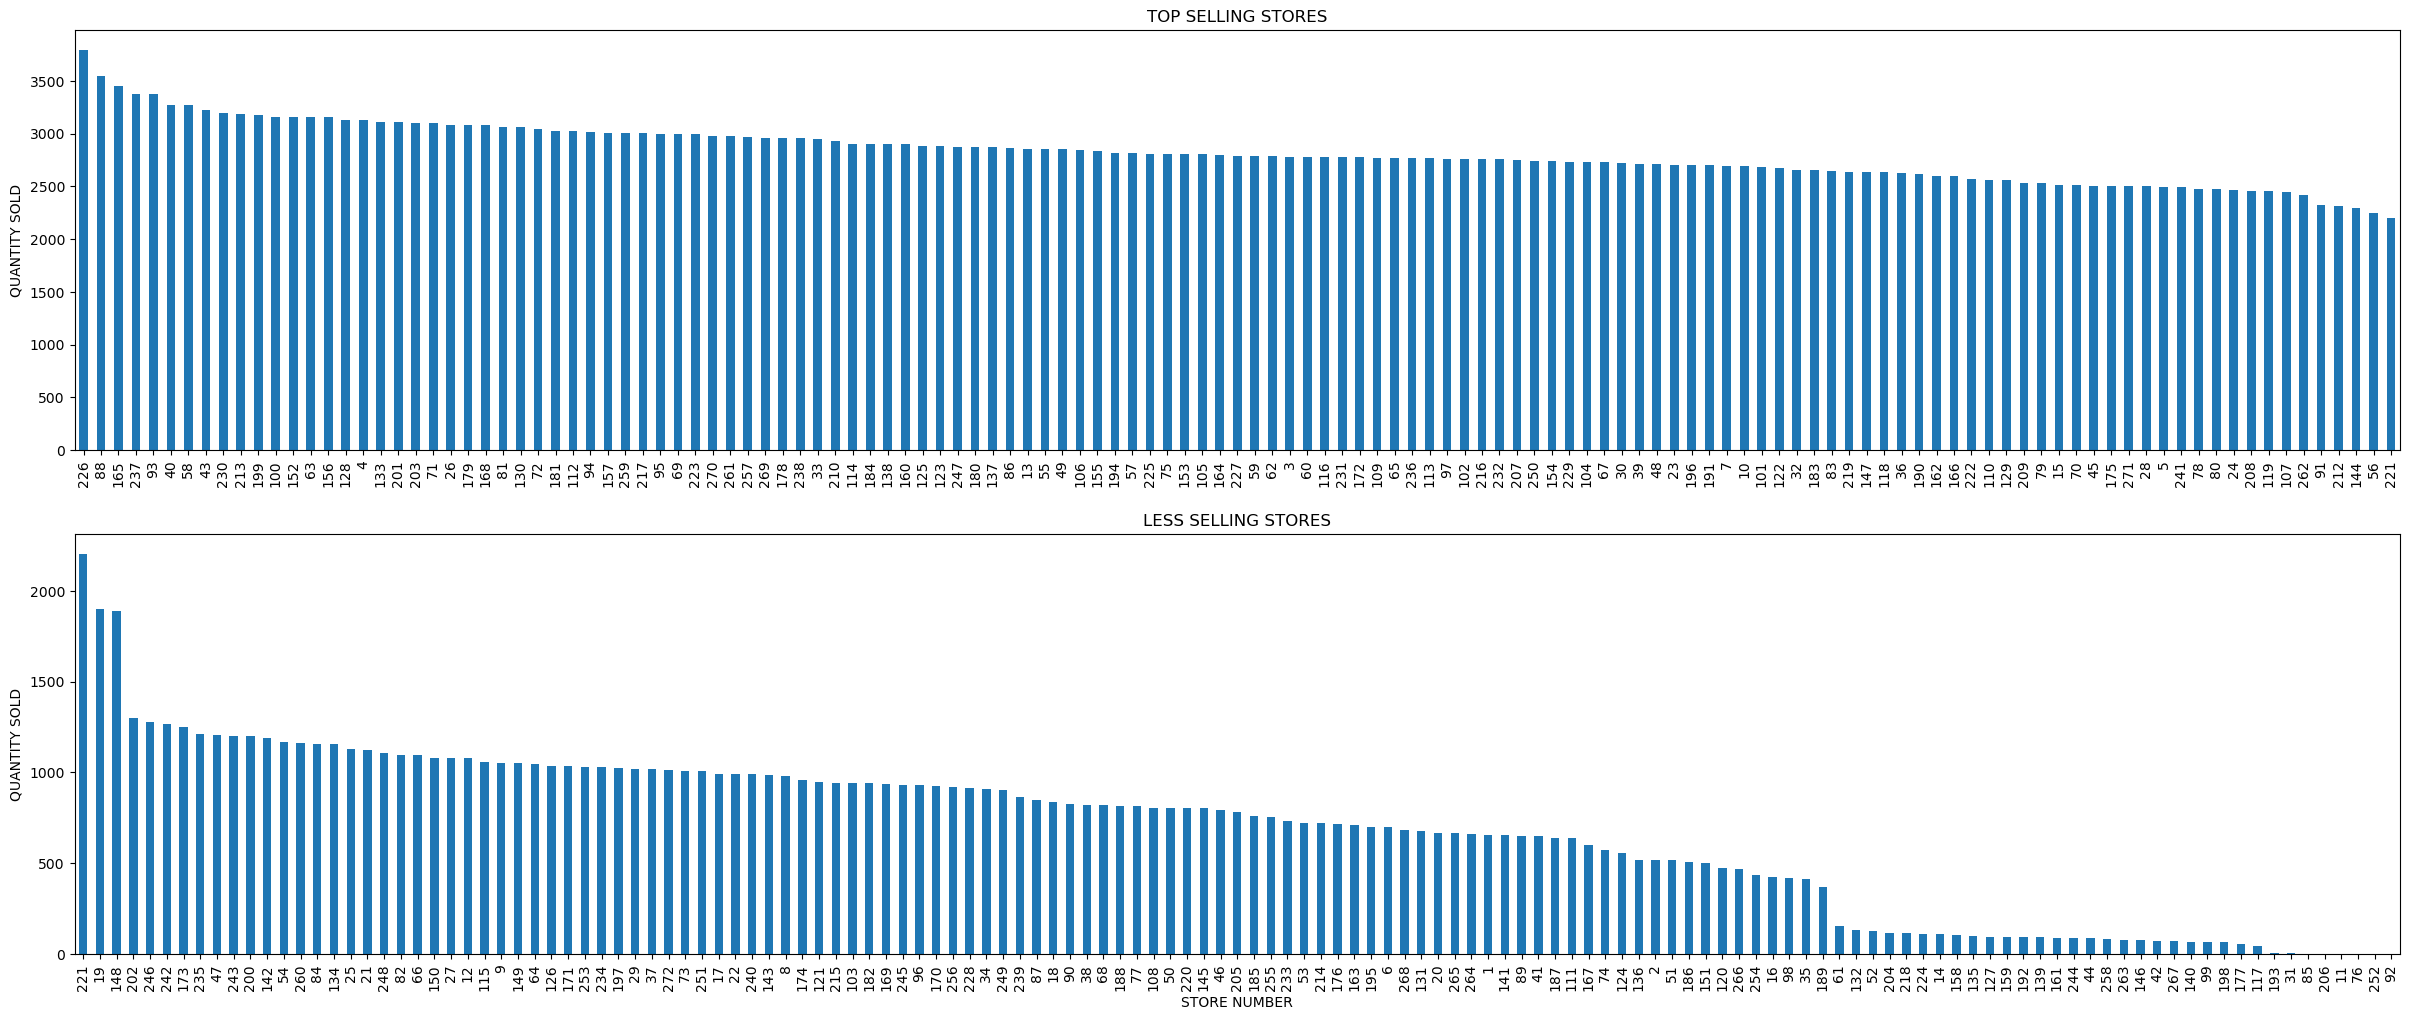

In [27]:
plt.figure(figsize=(30,12))
plt.subplot(2,1,1)
transaction.groupby('STORE_NBR').PROD_QTY.sum().sort_values(ascending=False).head(133).plot(kind="bar")
plt.title("TOP SELLING STORES")
plt.ylabel("QUANTITY SOLD")
plt.xlabel('')


plt.subplot(2,1,2)
transaction.groupby('STORE_NBR').PROD_QTY.sum().sort_values(ascending=False).tail(272-133).plot(kind="bar")
plt.title("LESS SELLING STORES")
plt.ylabel("QUANTITY SOLD")
plt.xlabel("STORE NUMBER");

`From here, the most performing store(226, 88) has sold over 3500 products while the least performing store has sold less than 250 units. Sales from store 85, 206,11,76,252, 92 are virtually negligible.`

## BRAND PERFORMANCE

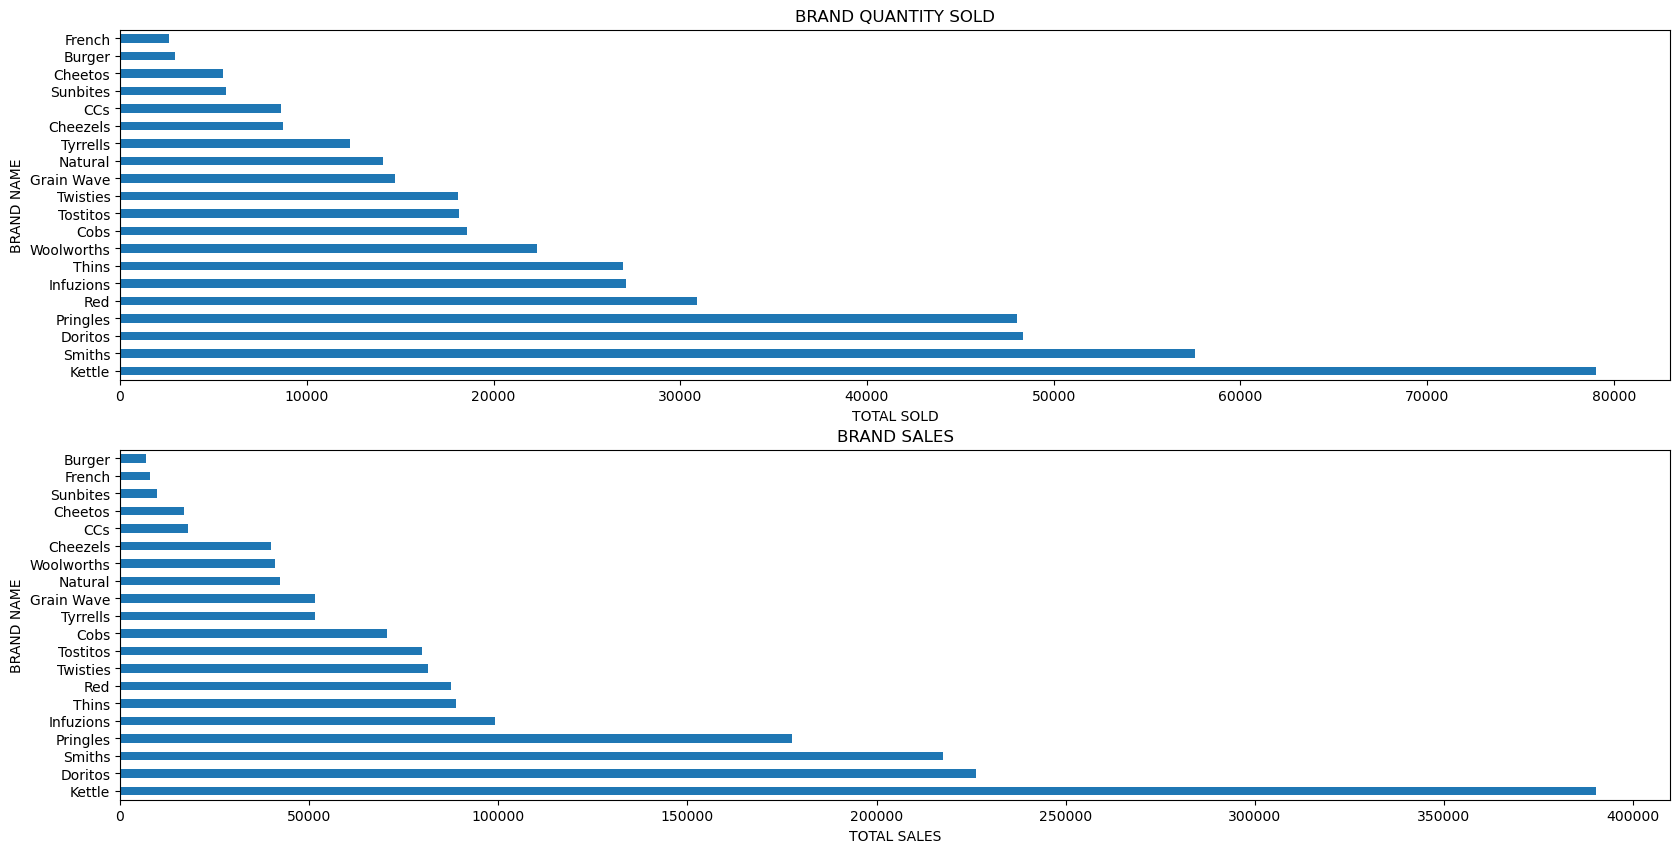

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
transaction.groupby('BRAND').PROD_QTY.sum().sort_values(ascending=False).plot(kind="barh")
plt.title("BRAND QUANTITY SOLD")
plt.xlabel("TOTAL SOLD")
plt.ylabel("BRAND NAME")

plt.subplot(2,1,2)
transaction.groupby('BRAND').TOT_SALES.sum().sort_values(ascending=False).plot(kind="barh")
plt.title("BRAND SALES")
plt.xlabel("TOTAL SALES")
plt.ylabel("BRAND NAME");

`The most performing brand appears to be the Kettle, Doritos and Smiths brands both in terms of total quantity and total sales.`

# MERGE DATA AND EXPLORE

In [29]:
df=pd.merge(purchase, transaction,on="LYLTY_CARD_NBR")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    246740 non-null  int64         
 1   LIFESTAGE         246740 non-null  object        
 2   PREMIUM_CUSTOMER  246740 non-null  object        
 3   DATE              246740 non-null  datetime64[ns]
 4   STORE_NBR         246740 non-null  object        
 5   TXN_ID            246740 non-null  int64         
 6   PROD_NBR          246740 non-null  object        
 7   PROD_NAME         246740 non-null  object        
 8   PROD_QTY          246740 non-null  int64         
 9   TOT_SALES         246740 non-null  float64       
 10  PRODUCT           246740 non-null  object        
 11  BRAND             246740 non-null  object        
 12  PACK_SIZE         246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memor

## CUSTOMER SEGMENTS PATTERNS

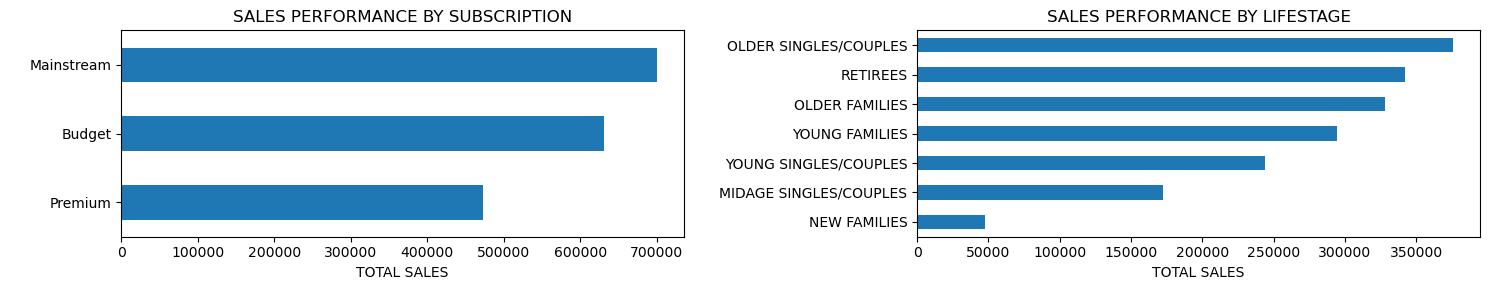

In [31]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
df.groupby("PREMIUM_CUSTOMER").TOT_SALES.sum().sort_values().plot(kind="barh")
plt.xlabel("TOTAL SALES")
plt.ylabel(" ")
plt.title("SALES PERFORMANCE BY SUBSCRIPTION")
plt.subplot(1,2,2)
df.groupby("LIFESTAGE").TOT_SALES.sum().sort_values().plot(kind="barh")
plt.xlabel("TOTAL SALES")
plt.ylabel(" ")
plt.title("SALES PERFORMANCE BY LIFESTAGE")
plt.tight_layout();

`From here, Mainstream Customers appears to contribute the highest to sales as well as thier numbers were observed to be higher than the other subscribers. On the other hand, although Retirees appeared to be highest in numbers, Older Singles/Couples appers as the highest driver of Total sales, followed by Retirees and Older Families. Young singles/couples also appear not to contribute to as much sales as thier numbers.`

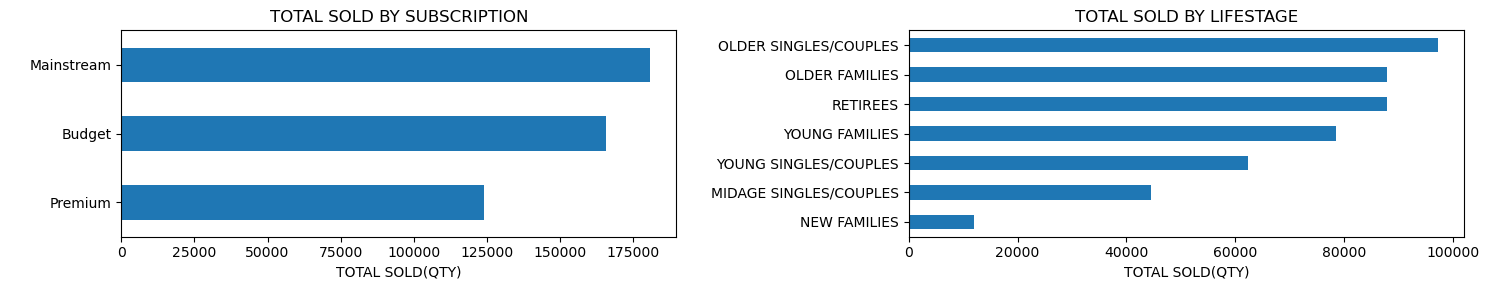

In [32]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
df.groupby("PREMIUM_CUSTOMER").PROD_QTY.sum().sort_values().plot(kind="barh")
plt.xlabel("TOTAL SOLD(QTY)")
plt.ylabel(" ")
plt.title("TOTAL SOLD BY SUBSCRIPTION")

plt.subplot(1,2,2)
df.groupby("LIFESTAGE").PROD_QTY.sum().sort_values().plot(kind="barh")
plt.xlabel("TOTAL SOLD(QTY)")
plt.ylabel(" ")
plt.title("TOTAL SOLD BY LIFESTAGE")
plt.tight_layout();

`We also see from here that, Older Singles/Couples, Older Families and Retirees appear to contribute the most towards quantity of products sold.`

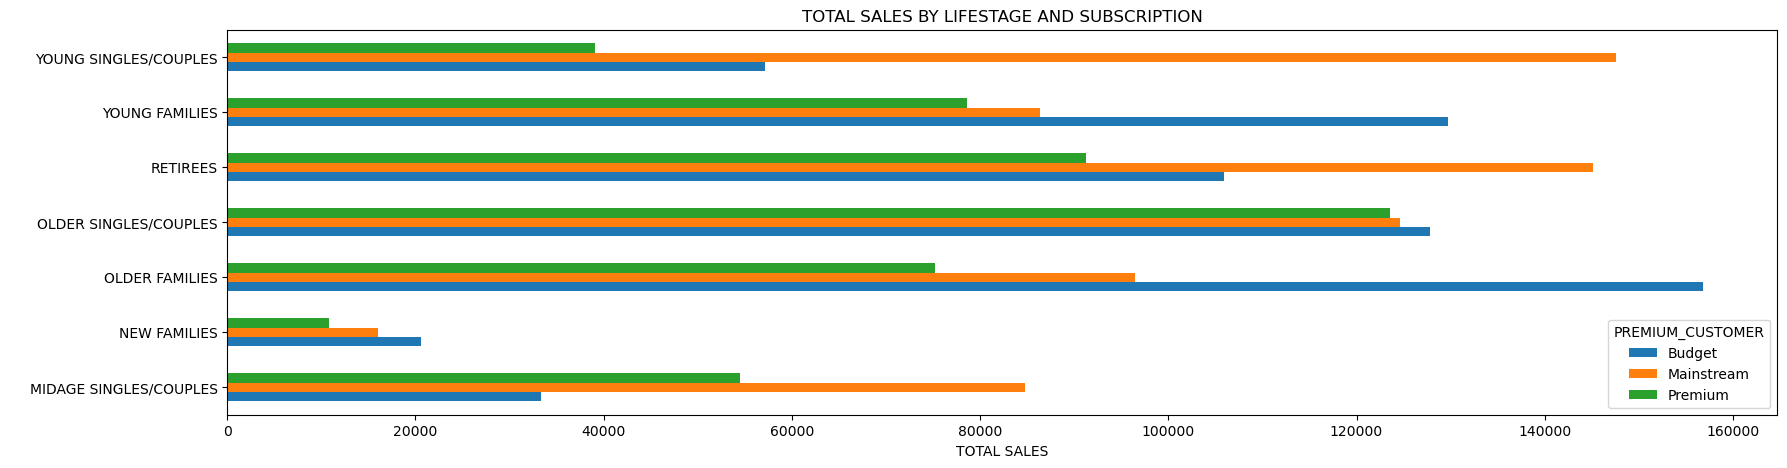

In [33]:
df.groupby(["LIFESTAGE",'PREMIUM_CUSTOMER']).TOT_SALES.sum().unstack().plot(kind="barh",figsize=(20,5), lw=1)
plt.xlabel("TOTAL SALES")
plt.ylabel(" ")
plt.title("TOTAL SALES BY LIFESTAGE AND SUBSCRIPTION");

`We observe here that for young singles/couples, majority of sales in driven by the mainstream subscribers which makes sense since majority are mainstream. This is also observed for the other top three lifestages in terms of sales. Older Singles/Couples is almost evenly distributed over the three types of subscription just as thier numbers, and Retirees is driven by Mainstream customers just as majority of the customers are mainstream.`

`However, Older Families is driven by the Budget Subscription although the number of customers are almost half of young singles/couples, the sales is more than that of  young singles/couples. This could be because this group prefer expensive and healthy chips or they buy more units per customer. This will have to be investigated further.`

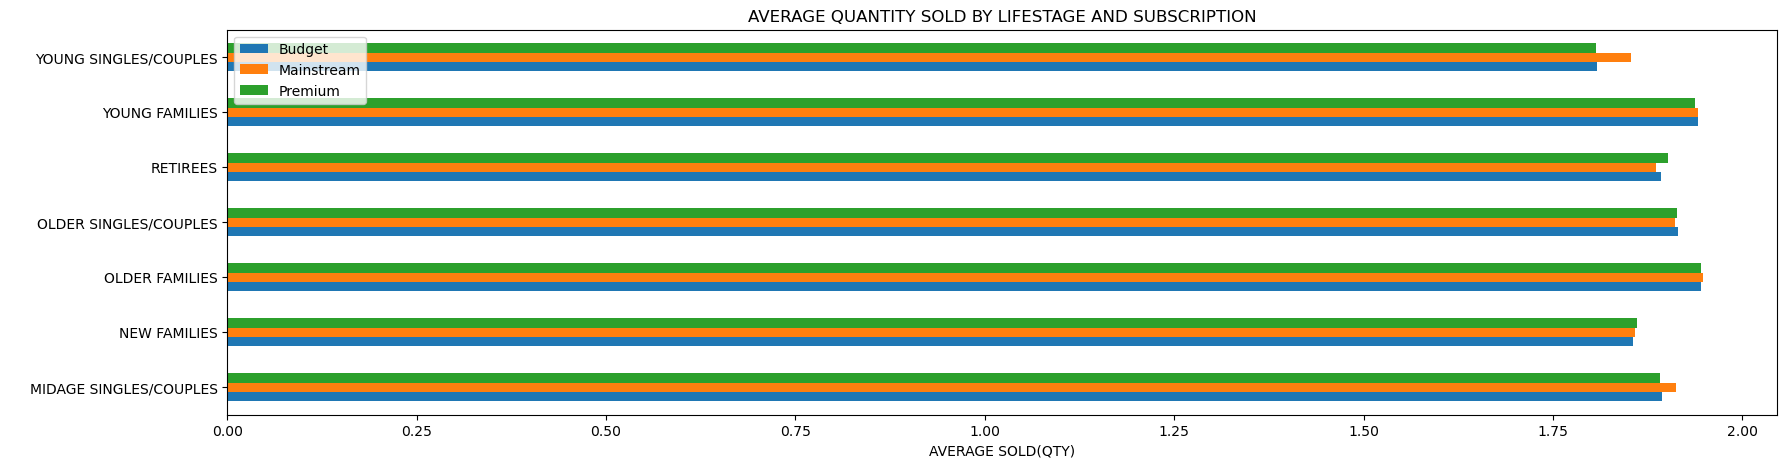

In [34]:
df.groupby(["LIFESTAGE",'PREMIUM_CUSTOMER']).PROD_QTY.mean().unstack().plot(kind="barh",figsize=(20,5), lw=1)
plt.xlabel("AVERAGE SOLD(QTY)")
plt.ylabel(" ")
plt.title("AVERAGE QUANTITY SOLD BY LIFESTAGE AND SUBSCRIPTION")
plt.legend(loc="upper left");

`Older families and young families in general buy more chips on average`

In [35]:
df["price_per_unit"]=df["TOT_SALES"]/df["PROD_QTY"]

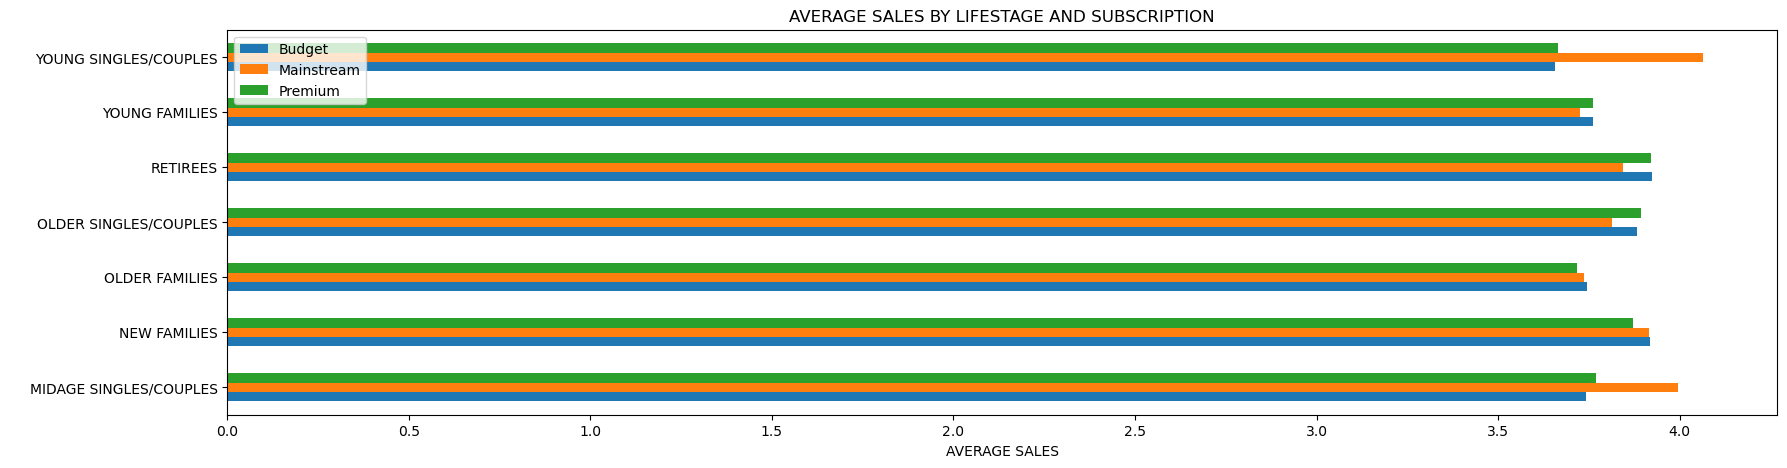

In [36]:
df.groupby(["LIFESTAGE",'PREMIUM_CUSTOMER']).price_per_unit.mean().unstack().plot(kind="barh",figsize=(20,5), lw=1)
plt.xlabel("AVERAGE SALES")
plt.ylabel(" ")
plt.title("AVERAGE SALES BY LIFESTAGE AND SUBSCRIPTION")
plt.legend(loc="upper left");

`It appears that, Mainstream Midage Singles/ Couples and Young Singles/ Couples are more willing to pay more on average compared to thier Budget and Premium counterparts. However, the difference does not appear to be much and can be investigated further to chack how significant the prices per unit are between the two groups.`

# INDEPENDENT T-TEST

**Null Hypothesis: There is no significant difference between the price per unit paid by Mainstream Midage Singles/ Couples and Young Singles/ Couples compared to thier Budget and Premium counterparts.**


**Alternate Hypothesis: There is a significant difference between the price per unit paid by Mainstream Midage Singles/ Couples and Young Singles/ Couples compared to thier Budget and Premium counterparts.**

In [37]:
df1 = list(df[(df['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]["price_per_unit"])
df2 = list(df[(df['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (df['PREMIUM_CUSTOMER'] != 'Mainstream')]["price_per_unit"])

In [38]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(df1, df2,equal_var=True)
print('t=%.3f, p=%.3f ' % (stat, p))

t=37.832, p=0.000 


**From above, we have a p value < 0.05 and we can reject the null hypothesis and conclude that there is a significant difference between the price per unit paid by Mainstream Midage Singles/ Couples and Young Singles/ Couples compared to thier Budget and Premium counterparts.**

From above, we see that Mainstream young Singles/Couples tend to be willing to pay more for a packet of chips than the others, therefore, let us investigate further into this group of consumers.

# AFFINITY ANALYSIS 

Affinity Analysis (or Market Basket Analysis) finds patterns to determine connections between purchases in order that stores can increase their cross-selling potential.

## USING APORIORI AND ASSOCIATION RULE

Both "Apriori" and "association rules" are concepts used in market basket analysis to find patterns and links among goods that are frequently bought together. They do, however, make reference to various components of the study and are frequently utilized in tandem.

Apriori Algorithm:

It is a data mining algorithm that locates itemsets (combinations of items) in a given dataset that have support above a predetermined minimum threshold.
The percentage of transactions that contain an itemset determines its support. For instance, the algorithm will locate all itemsets that appear in at least 10% of the transactions if the support criterion is set to 0.1 (10%).

Association Rules:

The actual rules that explain the connections between elements in a collection are called association rules. These rules often take the form of "If item A is purchased, then item B is also likely to be purchased."

The Apriori algorithm is used in market basket analysis to find common itemsets, which are subsequently used to produce association rules. The frequently occurring itemsets are frequently employed as the antecedents of association rules, while the consequents can be other items that co-occur frequently.

Since Mainstream young Singles/Couples tend to be willing to pay more for a packet of chips than the others, let's perform some market basket analysis to understand thier purchase patterns further.

In [46]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Apriori and Association Rules for Brand

In [44]:
ysm_brand_basket=(df[(df['LIFESTAGE']=="YOUNG SINGLES/COUPLES")  & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]
        .groupby(['LYLTY_CARD_NBR','BRAND'])['PROD_QTY']
        .sum().unstack().reset_index().fillna(0)
        .set_index('LYLTY_CARD_NBR'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
ysm_brand_basket = ysm_brand_basket.applymap(encode_units)
ysm_brand_basket

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Wave,Infuzions,Kettle,Natural,Pringles,Red,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
frequent_itemsets = apriori(ysm_brand_basket, min_support=0.07, use_colnames=True)
frequent_itemsets.head()

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.103827,(Cobs)
1,0.260326,(Doritos)
2,0.078818,(Grain Wave)
3,0.143110,(Infuzions)
4,0.387142,(Kettle)


In [49]:
rules = association_rules(frequent_itemsets, metric="lift")
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Doritos),(Kettle),0.260326,0.387142,0.089933,0.345463,0.892344,-0.010850,0.936324,-0.140232
1,(Kettle),(Doritos),0.387142,0.260326,0.089933,0.232300,0.892344,-0.010850,0.963494,-0.164477
2,(Kettle),(Pringles),0.387142,0.256158,0.091449,0.236215,0.922148,-0.007720,0.973890,-0.121076
3,(Pringles),(Kettle),0.256158,0.387142,0.091449,0.357002,0.922148,-0.007720,0.953126,-0.101929
4,(Smiths),(Kettle),0.202476,0.387142,0.075660,0.373674,0.965214,-0.002727,0.978498,-0.043236
5,(Kettle),(Smiths),0.387142,0.202476,0.075660,0.195432,0.965214,-0.002727,0.991246,-0.055540


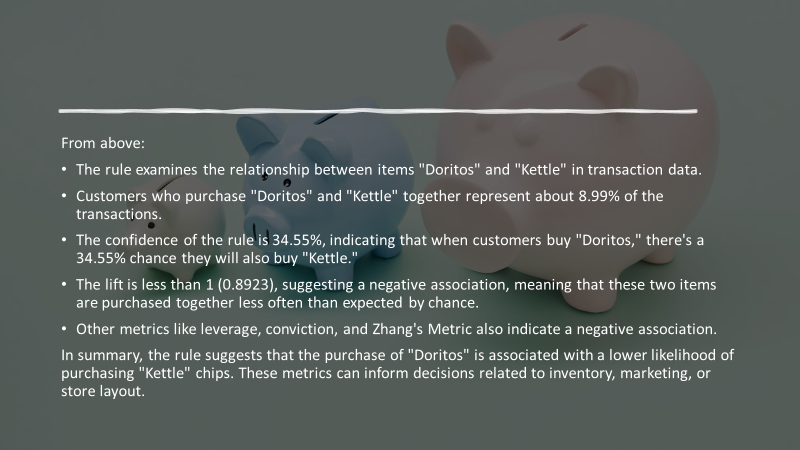

## Apriori and Association Rules for Pack Size

In [51]:
basket_pack_size= (df.groupby(['LYLTY_CARD_NBR', 'PACK_SIZE'])['PROD_QTY']
                     .sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_pack_size = basket_pack_size.applymap(encode_units)
basket_pack_size

PACK_SIZE,110,125,134,135,150,160,165,170,175,180,190,200,210,220,250,270,330,380,70,90
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1004,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2370701,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2370751,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
frequent_itemsets = apriori(basket_pack_size, min_support=0.07, use_colnames=True)
frequent_itemsets.head()

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.262011,(110)
1,0.289772,(134)
2,0.411842,(150)
3,0.185574,(165)
4,0.237294,(170)


In [54]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(134),(110),0.289772,0.262011,0.085850,0.296268,1.130744,0.009927,1.048678,0.162802
1,(110),(134),0.262011,0.289772,0.085850,0.327658,1.130744,0.009927,1.056349,0.156677
2,(150),(110),0.411842,0.262011,0.116136,0.281992,1.076258,0.008229,1.027828,0.120470
3,(110),(150),0.262011,0.411842,0.116136,0.443249,1.076258,0.008229,1.056410,0.096011
4,(175),(110),0.571437,0.262011,0.155821,0.272683,1.040729,0.006098,1.014672,0.091316


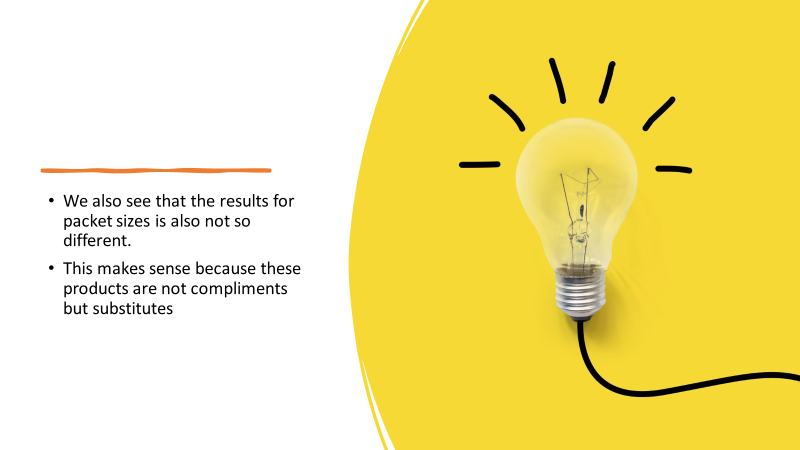

## Affinity Analysis for Mainstream Midage Singles/ Couples and Young Singles/ Couples

In [55]:
dfy=df[(df['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]
dfo=df[(df['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (df['PREMIUM_CUSTOMER'] != 'Mainstream')]

## BRAND AFFINITY

In [56]:
basket1= dfy.groupby(['BRAND'])[['PROD_QTY']].sum()
basket2= dfo.groupby(['BRAND'])[['PROD_QTY']].sum()

basket1_ratio = basket1.PROD_QTY /  basket1.PROD_QTY.sum()
basket1_ratio.name="TARGETTED_SEGMENT"

basket2_ratio = basket2.PROD_QTY /  basket2.PROD_QTY.sum()
basket2_ratio.name="OTHER_SEGMENT"

brand_proportions = pd.concat([basket1_ratio,basket2_ratio], names=["TARGETTED_SEGMENT","OTHER_SEGMENT"],axis=1)

brand_proportions["AFFINITY_TO_BRAND"] = brand_proportions.TARGETTED_SEGMENT / brand_proportions.OTHER_SEGMENT
brand_proportions = brand_proportions.sort_values("AFFINITY_TO_BRAND")

<Axes: ylabel='BRAND'>

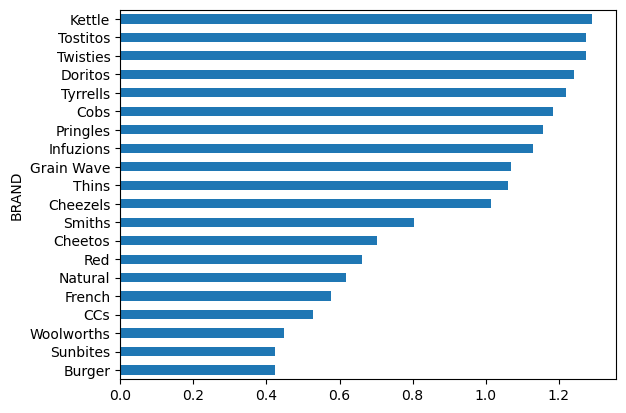

In [57]:
brand_proportions["AFFINITY_TO_BRAND"].plot(kind="barh")

## PACK AFFINITY

In [58]:
basket11= dfy.groupby(['PACK_SIZE'])[['PROD_QTY']].sum()
basket21= dfo.groupby(['PACK_SIZE'])[['PROD_QTY']].sum()

basket11_ratio = basket11.PROD_QTY /  basket11.PROD_QTY.sum()
basket11_ratio.name="TARGETTED_SEGMENT"

basket21_ratio = basket21.PROD_QTY /  basket21.PROD_QTY.sum()
basket21_ratio.name="OTHER_SEGMENT"

brand_proportions1 = pd.concat([basket11_ratio,basket21_ratio], names=["TARGETTED_SEGMENT","OTHER_SEGMENT"],axis=1)

brand_proportions1["AFFINITY_TO_PACK"] = brand_proportions1.TARGETTED_SEGMENT / brand_proportions1.OTHER_SEGMENT
brand_proportions1 = brand_proportions1.sort_values("AFFINITY_TO_PACK")

<Axes: ylabel='PACK_SIZE'>

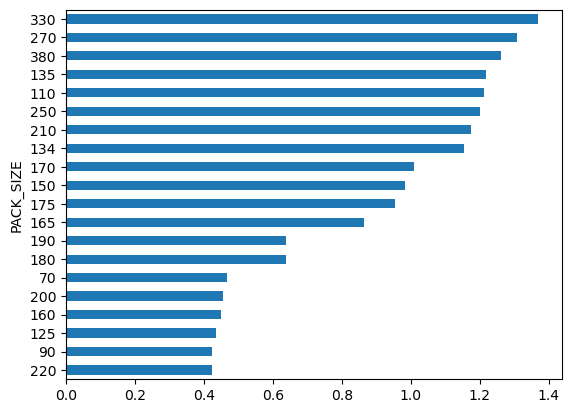

In [59]:
brand_proportions1["AFFINITY_TO_PACK"].plot(kind="barh")

In [60]:
df[df["PACK_SIZE"]=="330"].BRAND.unique()

array(['Doritos', 'Smiths', 'Cheezels'], dtype=object)

## Trend

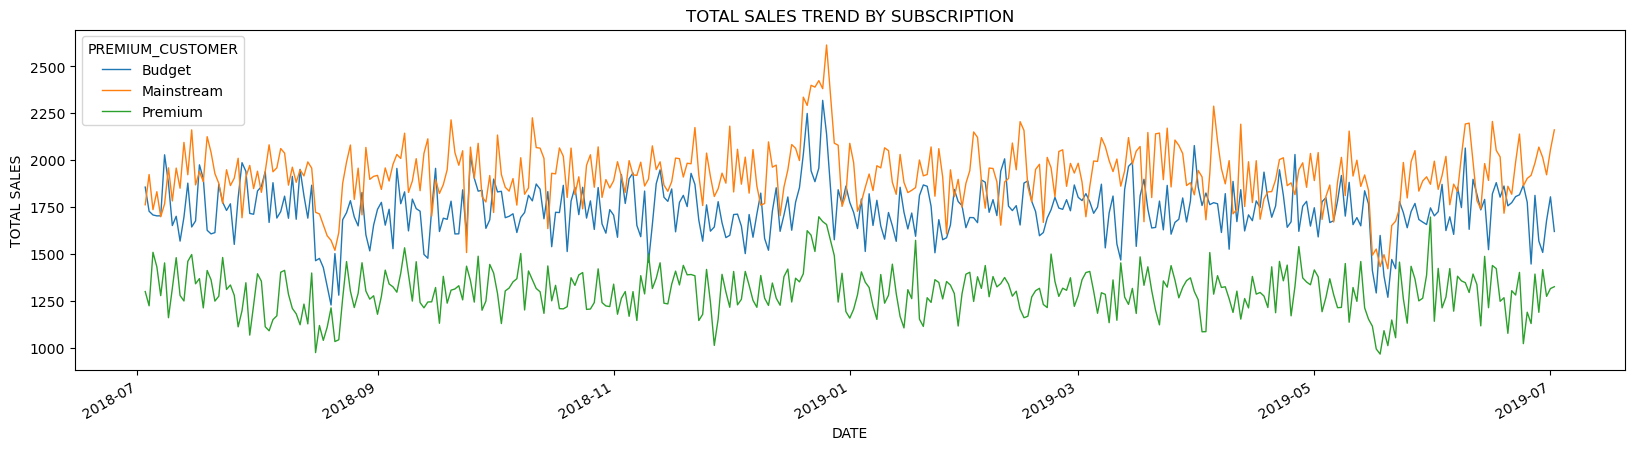

In [61]:
df.groupby(['DATE','PREMIUM_CUSTOMER']).TOT_SALES.sum().unstack().plot(kind="line",figsize=(20,5), lw=1)
plt.ylabel("TOTAL SALES")
plt.title("TOTAL SALES TREND BY SUBSCRIPTION");

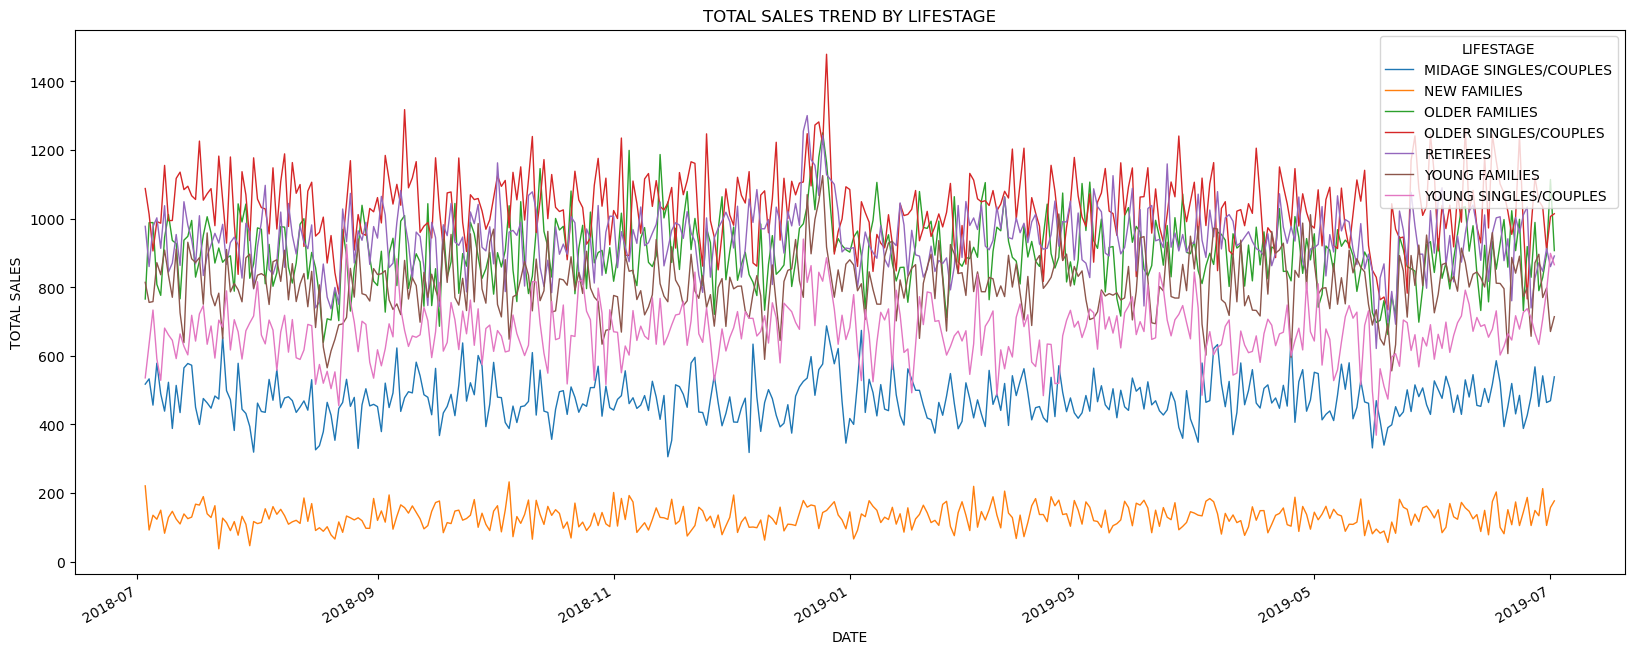

In [62]:
df.groupby(['DATE',"LIFESTAGE"]).TOT_SALES.sum().unstack().plot(kind="line",figsize=(20,8), lw=1)
plt.ylabel("TOTAL SALES")
plt.title("TOTAL SALES TREND BY LIFESTAGE");

`The trend of sales appears to be consistent with the general trend at all levels of subscription and lifestages except for new families and this is possibly due to thier fewer numbers.`

## BRAND SALES

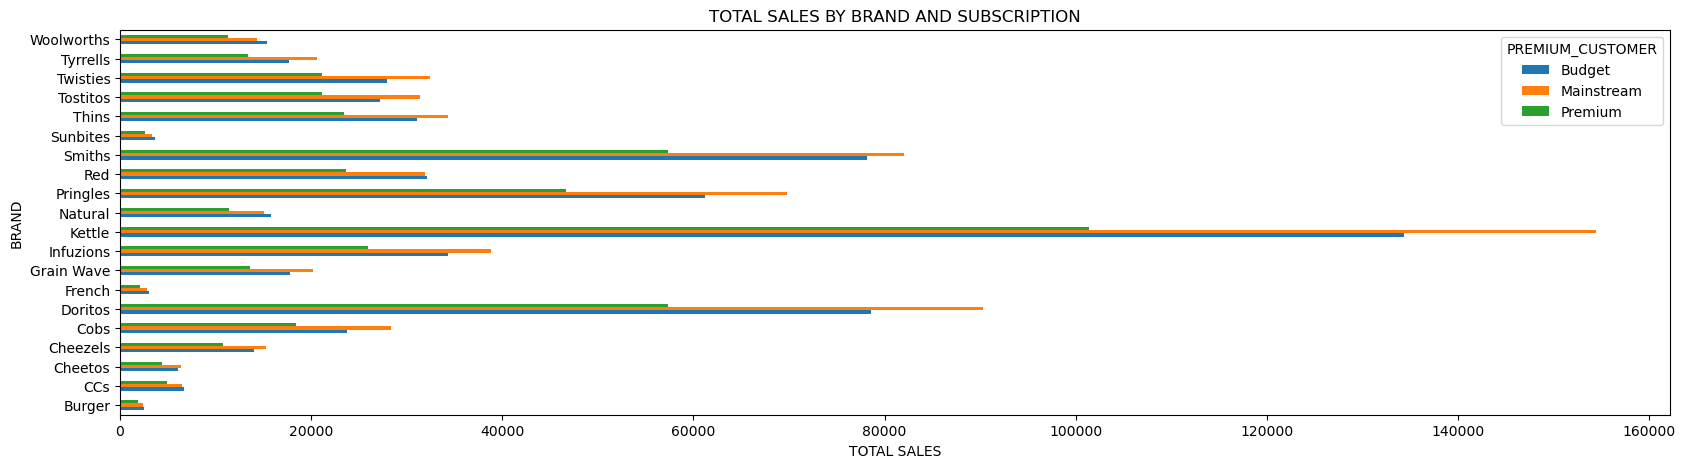

In [63]:
df.groupby(['BRAND','PREMIUM_CUSTOMER']).TOT_SALES.sum().unstack().plot(kind="barh",figsize=(20,5), lw=1)
plt.xlabel("TOTAL SALES")
plt.title("TOTAL SALES BY BRAND AND SUBSCRIPTION");

`From here, most of the sales for majority of the brands comes from mainstream and budget subscribers `


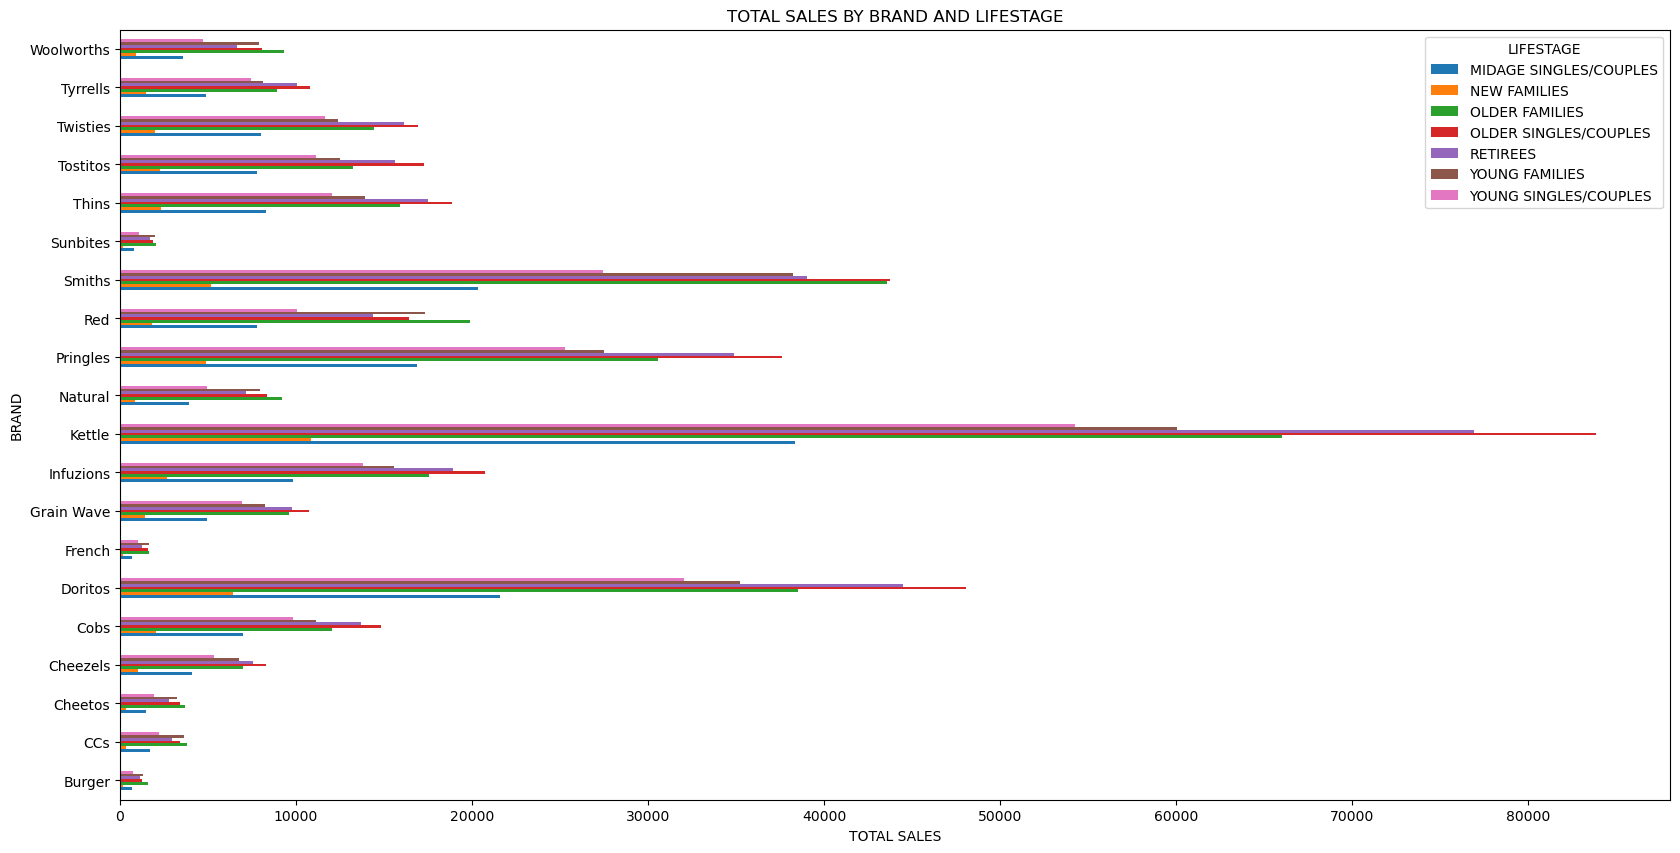

In [64]:
df.groupby(['BRAND',"LIFESTAGE"]).TOT_SALES.sum().unstack().plot(kind="barh",figsize=(20,10), lw=1)
plt.xlabel("TOTAL SALES")
plt.title("TOTAL SALES BY BRAND AND LIFESTAGE");

`We observe that most of the sales for Kettle and Doritos come from Older singles/couples and retirees while smiths is Older singles/couples and Older families.`

## PACK SIZE SALES

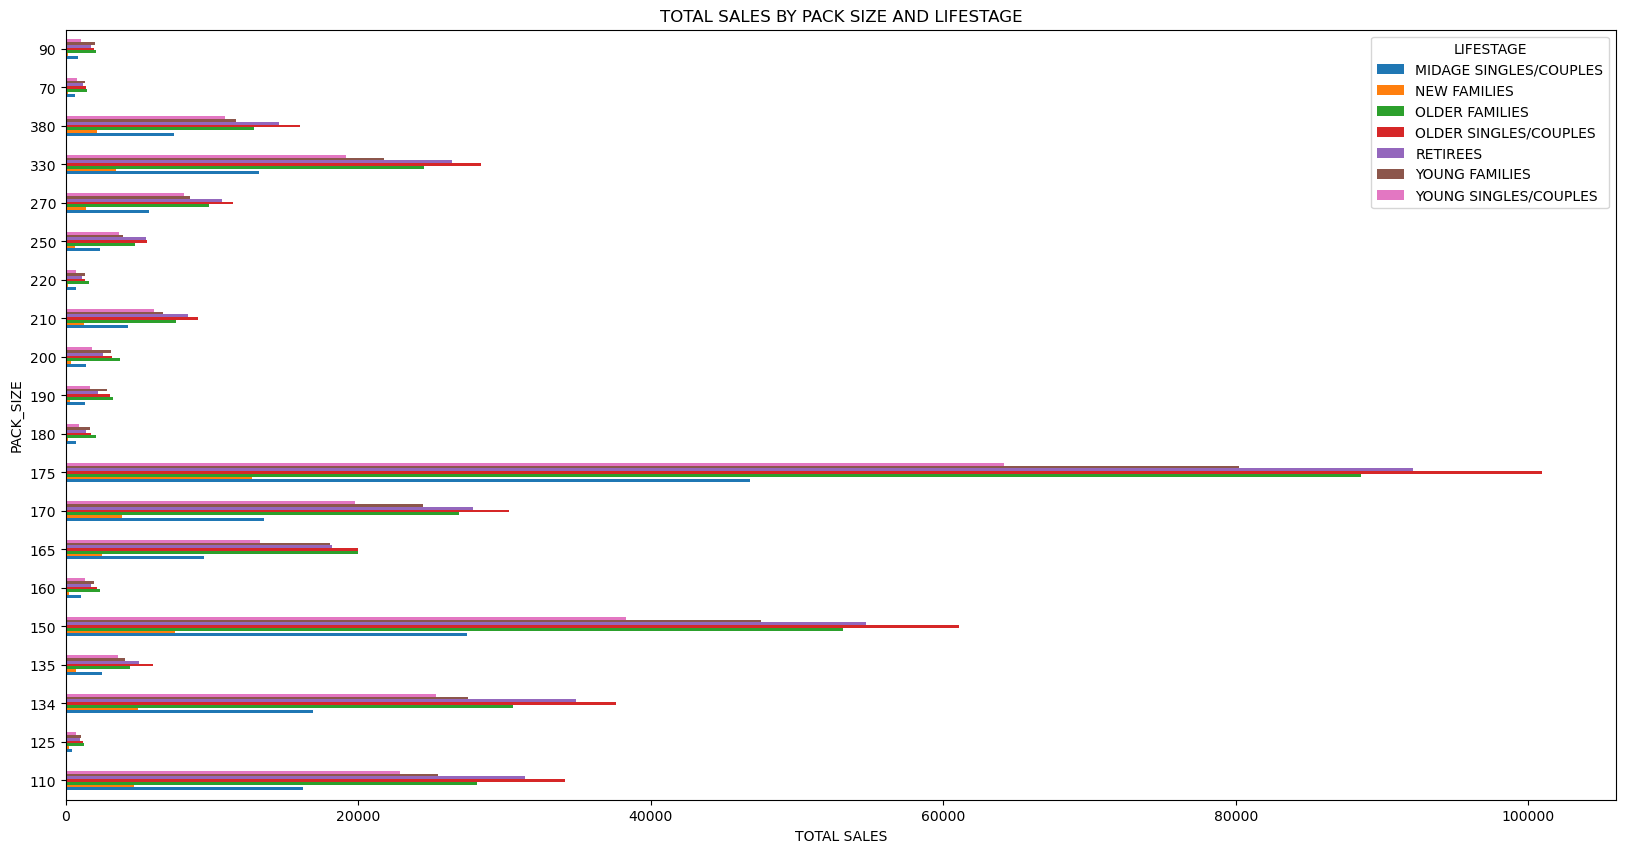

In [65]:
df.groupby(['PACK_SIZE',"LIFESTAGE"]).TOT_SALES.sum().unstack().plot(kind="barh",figsize=(20,10), lw=1)
plt.xlabel("TOTAL SALES")
plt.title("TOTAL SALES BY PACK SIZE AND LIFESTAGE");

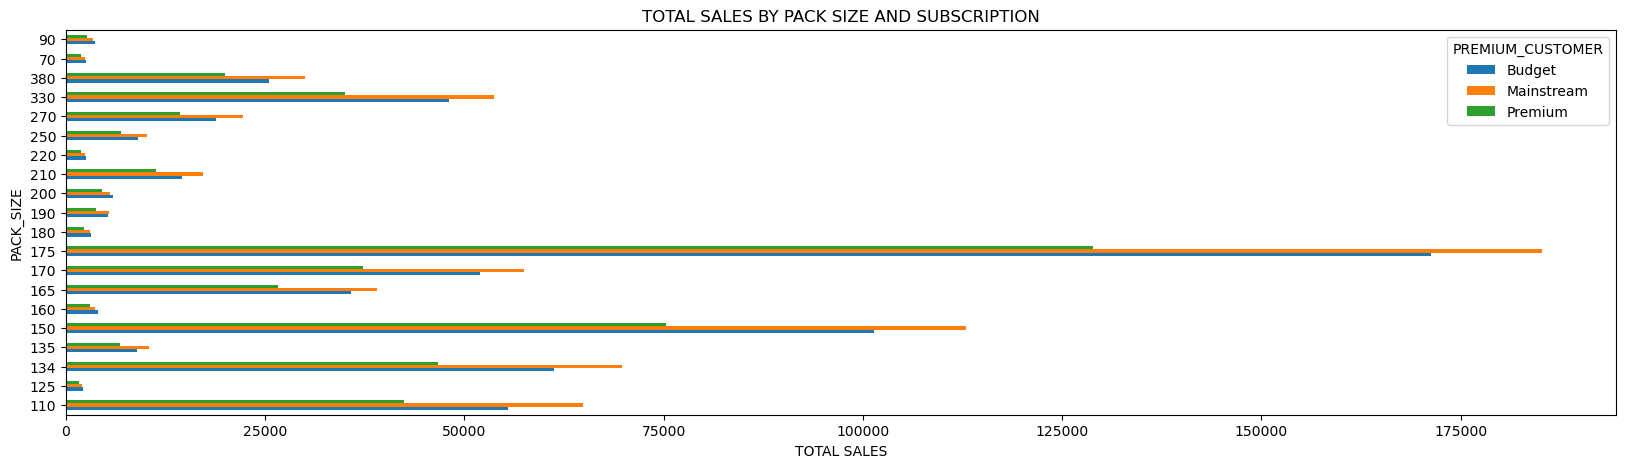

In [66]:
df.groupby(['PACK_SIZE','PREMIUM_CUSTOMER']).TOT_SALES.sum().unstack().plot(kind="barh",figsize=(20,5), lw=1)
plt.xlabel("TOTAL SALES")
plt.title("TOTAL SALES BY PACK SIZE AND SUBSCRIPTION");

`It is seen that majority of the customers from all the different lifestages and subscriptions prefer the 175g packet size and it is the major driver of sales`

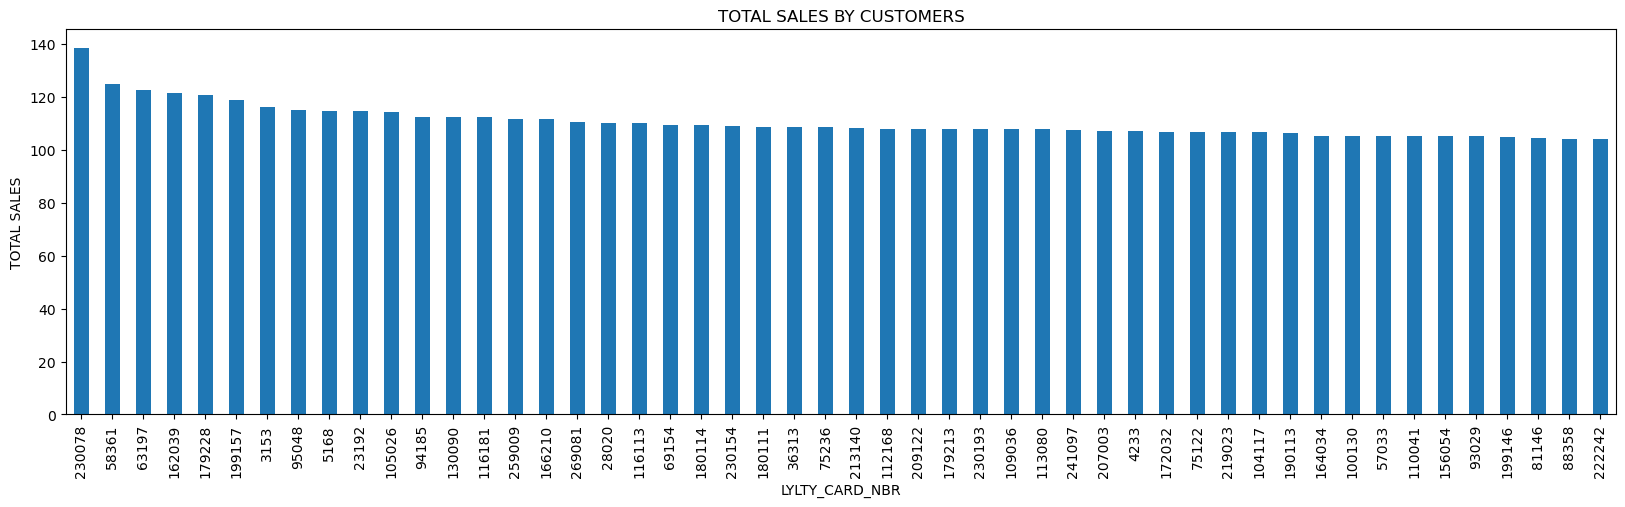

In [67]:
df.groupby(["LYLTY_CARD_NBR"]).TOT_SALES.sum().sort_values(ascending=False).head(50).plot(kind="bar", figsize=(20,5))
plt.ylabel("TOTAL SALES")
plt.title("TOTAL SALES BY CUSTOMERS");

`Customer 230078 appears to have contributed the most to chips sales`

# CONCLUSION

- Majority of chips customers are mainstream young singles/couples and Retirees
- The major spike in sales occured in December 2018 and major dips occured in August 2018 and May 2019
- The product with the highest sold quantity is 102(Kettle Mozzarella basil pesto) although it ranks 4th in sales. Product 4(Dorito Corn Chips Supreme) ranked highest in sales and 16th in quantity sold. This makes product 4 interesting as the difference in quantity sold appears not to be much compared to the sales difference for the two products. Also, crinkle cut original appears to contribute the least to sales
- The most purchased and highest sales generation pack size is 175g.
- Store 226 has sold the highest number of chips
- The most performing brand appears to be the Kettle, Doritos and Smiths brands both in terms of total quantity and total sales.
- Budget Older Families appear to contribute the most to sales.
- Mainstream young singles/couples appear to purchase more packs of chips on average than thier counterparts.
- Mainstream Midage Singles/ Couples and especially, Young Singles/ Couples are significantly more willing to pay more for a pack on average compared to thier Budget and Premium counterparts.
- Mainstream Midage Singles/ Couples and Young Singles/ Couples appear to show a higher affinity towards the Kettle brand and 330 pack size.
- Customer 230078 appears to have contributed the most to chips sales.